# Final Project
## Mike Johnson
### December 13, 2024

****

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Read in the data, call the dataframe "s"  and check the dimensions of the dataframe

In [2]:
# Read csv
s = pd.read_csv('social_media_usage.csv')

In [3]:
# Check the dimensions of the dataframe
s.shape

(1502, 89)

In [4]:
# Verify dataframe loaded correctly
s.head()

,respid,sample,comp,int_date,lang,state,density,usr,qs1,sex,...,income,party,partyln,hh1,hh3,ql1,ql1a,qc1,weight,cellweight
0,798,1,1,1/26/2021,1,51,5,S,,2,...,6,2,,1,,1,,,0.557187,
1,1017,1,1,1/25/2021,1,39,2,S,,1,...,5,1,,2,2,1,,,0.987209,
2,1181,1,1,1/25/2021,1,32,2,U,,2,...,8,3,2,2,2,1,,,0.925147,
3,1388,1,1,1/25/2021,1,4,3,U,,1,...,8,2,,1,,1,,,0.311080,
4,1664,1,1,1/26/2021,1,12,2,S,,2,...,7,2,,2,2,1,,,0.396548,


****

#### 2. Define a function called clean_sm that takes one input, x, and uses `np.where` to check whether x is equal to 1. If it is, make the value of x = 1, otherwise make it 0. Return x. Create a toy dataframe with three rows and two columns and test your function to make sure it works as expected.

In [5]:
# Create clean_sm function
def clean_sm(x):
    return np.where(x == 1, 1, 0)

In [6]:
# Create toy dataframe to test function
toy_df = pd.DataFrame({'Column1' : [1, 2, 3],
                      'Column2' : [1, 1, 0]})

toy_df

,Column1,Column2
0,1,1
1,2,1
2,3,0


In [7]:
# Apply function to toy dataframe
toy_df = toy_df.apply(clean_sm)

toy_df

,Column1,Column2
0,1,1
1,0,1
2,0,0


****

#### 3. Create a new dataframe called "ss". The new dataframe should contain a target column called sm_li which should be a binary variable ( that takes the value of 1 if it is 1 and 0 otherwise (use clean_sm to create this) which indicates whether or not the individual uses LinkedIn, and the following features: income (ordered numeric from 1 to 9, above 9 considered missing), education (ordered numeric from 1 to 8, above 8 considered missing), parent (binary), married (binary), female (binary), and age (numeric, above 98 considered missing). Drop any missing values. Perform exploratory analysis to examine how the features are related to the target.

##### Create "ss" and apply transformations.

In [8]:
# Create new dataframe
ss = s

In [9]:
# Create target column that indicates whether the individual uses LinkedIn
ss['sm_li'] = clean_sm(ss['web1h'])

In [10]:
# Transformations
ss['income'] = np.where(ss['income'] > 9, np.nan, ss['income']) # Above 9 is considered missing.
ss['education'] = np.where(ss['educ2'] > 8, np.nan, ss['educ2']) # Above 8 is considered missing.
ss['parent'] = np.where(ss['par'] == 1, True, False) # Binary
ss['married'] = np.where(ss['marital'] == 1, True, False) # Binary
ss['female'] = np.where(ss['gender'] == 2, True, False) # Binary
ss['age'] = np.where(ss['age'] > 98, np.nan, ss['age']) # Above 98 is considered missing.

In [11]:
# Select columns to include
ss = ss[['sm_li',
         'income',
         'education',
         'parent',
         'married',
         'female',
         'age']]

ss.head()

,sm_li,income,education,parent,married,female,age
0,0,6.0,4.0,False,False,True,77.0
1,0,5.0,3.0,False,False,False,59.0
2,0,8.0,4.0,False,True,True,60.0
3,0,8.0,8.0,False,False,False,73.0
4,1,7.0,8.0,False,True,True,65.0


In [12]:
# Check for NA values
ss.isna().sum()

sm_li          0
income       229
education     23
parent         0
married        0
female         0
age           54
dtype: int64

In [13]:
# Remove NA's
ss = ss.dropna()

In [14]:
# Verify that NA's were removed
ss.isna().sum()

sm_li        0
income       0
education    0
parent       0
married      0
female       0
age          0
dtype: int64

##### Exploratory analysis

Income

In [15]:
# Subset that calculates %'s of total for each income bracket
prob_income = pd.crosstab(ss['income'],
                           ss['sm_li'],
                           normalize = 'index').reset_index()


prob_income = prob_income.drop(columns = 0) # Isolate LinkedIn users
prob_income[1] = (prob_income[1].round(2) * 100) # Convert to percent


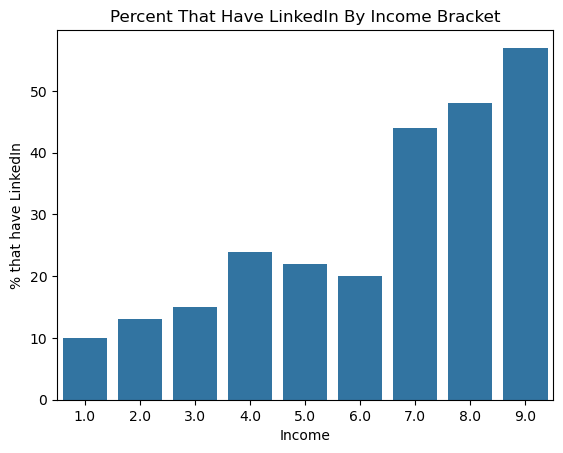

In [16]:
# Visualize prob_income
viz_income = sns.barplot(x = 'income',
                         y = 1,
                         data = prob_income)

# Add labels and title
viz_income.set(xlabel = 'Income',
               ylabel = '% that have LinkedIn',
               title = 'Percent That Have LinkedIn By Income Bracket')

plt.show()

As income increases, the likelihood that an individual has linked in increases. At level 7 (75K - 100K) the likelihood increases significantly.

Education

In [17]:
# Subset that calculates %'s of total for each education bracket
prob_ed = pd.crosstab(ss['education'],
                           ss['sm_li'],
                           normalize = 'index').reset_index()


prob_ed = prob_ed.drop(columns = 0) # Isolate LinkedIn users
prob_ed[1] = (prob_ed[1].round(2) * 100) # Convert to percent

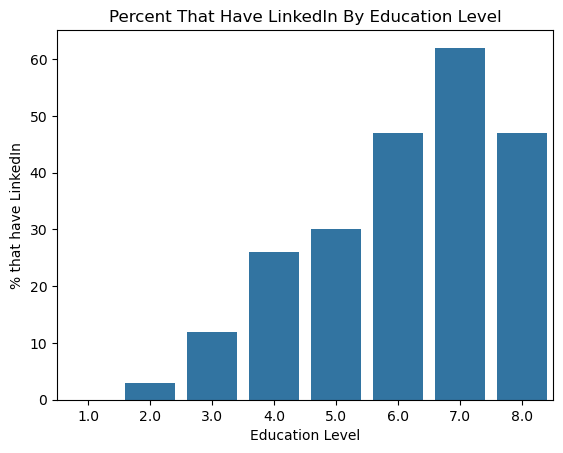

In [18]:
# Visualize prob_ed
viz_ed = sns.barplot(x = 'education',
                         y = 1,
                         data = prob_ed)

# Add labels and title
viz_ed.set(xlabel = 'Education Level',
           ylabel = '% that have LinkedIn',
           title = 'Percent That Have LinkedIn By Education Level')

plt.show()

As the education level increases, the likelihood that the individual has LinkedIn increases. 

Parent

In [19]:
# Subset that calculates %'s of  if parent
prob_parent = pd.crosstab(ss['parent'],
                          ss['sm_li'],
                          normalize = 'index').reset_index()

prob_parent = prob_parent.drop(columns = 0) # Isolate LinkedIn users
prob_parent[1] = (prob_parent[1].round(2) * 100) # Convert to percent


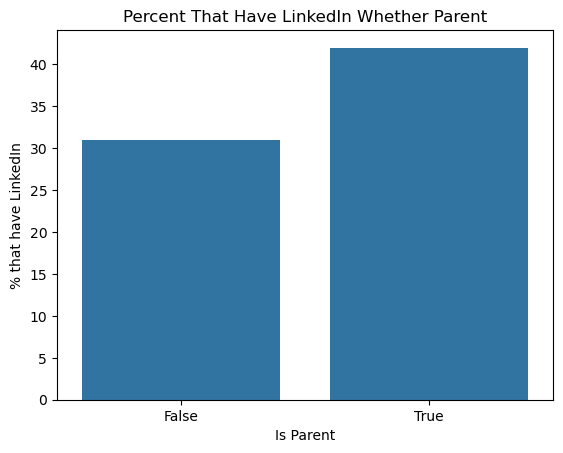

In [20]:
# Visualize prob_ed
viz_parent = sns.barplot(x = 'parent',
                         y = 1,
                         data = prob_parent)

# Add labels and title
viz_parent.set(xlabel = 'Is Parent',
               ylabel = '% that have LinkedIn',
               title = 'Percent That Have LinkedIn Whether Parent')

plt.show()

Parents are more likely to have LinkedIn.

Married

In [21]:
# Subset that calculates %'s of  if married
prob_married = pd.crosstab(ss['married'],
                           ss['sm_li'],
                           normalize = 'index').reset_index()

prob_married = prob_married.drop(columns = 0) # Isolate LinkedIn users
prob_married[1] = (prob_married[1].round(2) * 100) # Convert to percent

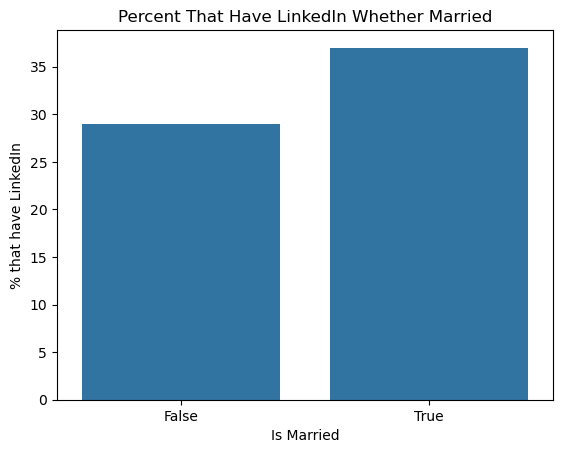

In [22]:
# Visualize prob_married
viz_married = sns.barplot(x = 'married',
                         y = 1,
                         data = prob_married)

# Add labels and title
viz_married.set(xlabel = 'Is Married',
               ylabel = '% that have LinkedIn',
               title = 'Percent That Have LinkedIn Whether Married')

plt.show()

Married individuals are more likely to have LinkedIn.

Female

In [23]:
# Subset that calculates %'s of  if female
prob_female = pd.crosstab(ss['female'],
                          ss['sm_li'],
                          normalize = 'index').reset_index()

prob_female = prob_female.drop(columns = 0) # Isolate LinkedIn users
prob_female[1] = (prob_female[1].round(2) * 100) # Convert to percent

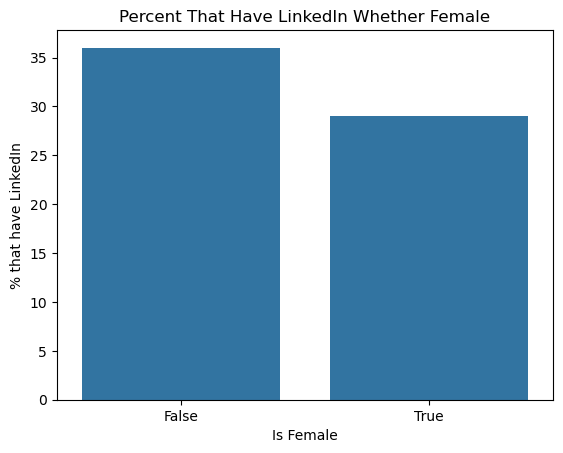

In [24]:
# Visualize prob_female
viz_female = sns.barplot(x = 'female',
                         y = 1,
                         data = prob_female)

# Add labels and title
viz_female.set(xlabel = 'Is Female',
               ylabel = '% that have LinkedIn',
               title = 'Percent That Have LinkedIn Whether Female')

plt.show()

Men are more likely to have LinkedIn.

Age

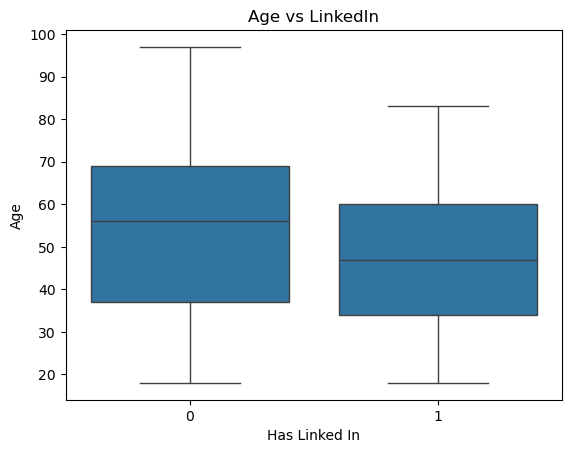

In [25]:
# Vizualize Age and LinkedIn
viz_age = sns.boxplot(x = 'sm_li',
                      y = 'age',
                      data = ss)

# Add labels and title
viz_age.set(xlabel = 'Has Linked In',
            ylabel = 'Age',
            title = 'Age vs LinkedIn')

plt.show()


Individuals that have LinkedIn are younger on average.

****

#### 4. Create a target vector (y) and feature set (X).

In [26]:
# Target Vector
y = ss['sm_li']

# Feature Set
X = ss.drop(columns = ['sm_li'])

****

#### 5. Split the data into training and test sets. Hold out 20% of the data for testing. Explain what each new object contains and how it is used in machine learning

In [27]:
# Load Library
from sklearn.model_selection import train_test_split

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify = y,
                                                    test_size = 0.2, 
                                                    random_state = 206)

**X_train**: This represents the training set for the feature variables, and includes 80% of the feature data. It is used to train the machine learning model. The model looks for patterns and relationships in the data.

**X_test**: This represents the test set for the feature variables, and inclues 20% of the feature data. It is used to evaluate the performance of the training model and asses how well the model generalizes new data.

**y_train**: This represents the training set for the target variable, and contains the corresponding y for the `X_train` data. It is used to train the model. The model learns to predict this variable based on the feature data.

**y_test**: This represents the test set for the the target variable, and contains the corresponding y for the `X_test` data. It is used to evaluate the accuracy of the model's predictions.

****

#### 6. Instantiate a logistic regression model and set class_weight to balanced. Fit the model with the training data.

In [29]:
# Load library
from sklearn.linear_model import LogisticRegression

In [30]:
# Crete logistic regression model
model = LogisticRegression( class_weight = 'balanced', random_state = 206)

# Fit the model with the training data
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=206)

****

#### 7. Evaluate the model using the testing data. What is the model accuracy for the model? Use the model to make predictions and then generate a confusion matrix from the model. Interpret the confusion matrix and explain what each number means.

In [31]:
# Load library
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
# Make predictions
y_pred = model.predict(X_test)

In [33]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6944444444444444

In [34]:
# Generate confusion matrix
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),
                           columns = ['Predicted Negative', 'Predicted Postive'],
                           index = ['Actual Negative', 'Actual Positive'])

conf_matrix

,Predicted Negative,Predicted Postive
Actual Negative,111,57
Actual Positive,20,64


* True Negatives (111): Instances where the model correctly predicted the negative class.
* False Positives (57): Instances where the model incorrectly predicted the positive class.
* False Negatives (20): Instances where the model incorrrectly predicted the negative class.
* True Positives (64): Instances where the model correctly predicted the posive class.

****

#### 8. Create the confusion matrix as a dataframe and add informative column names and index names that indicate what each quadrant represents

In [35]:
conf_matrix

,Predicted Negative,Predicted Postive
Actual Negative,111,57
Actual Positive,20,64


****

#### 9. Aside from accuracy, there are three other metrics used to evaluate model performance: precision, recall, and F1 score. Use the results in the confusion matrix to calculate each of these metrics by hand. Discuss each metric and give an actual example of when it might be the preferred metric of evaluation. After calculating the metrics by hand, create a classification_report using sklearn and check to ensure your metrics match those of the classification_report.

In [36]:
# Manually calculate precision
prec = round(64 / (64 + 57), 2)
prec

0.53

In [37]:
# Manually caluclate recall
recall = round(64 / (64 + 20), 2)
recall

0.76

In [38]:
# Manually calculate F1 Score
round(2 * (prec * recall) / (prec + recall), 2)

0.62

In [39]:
# Get other metrics with classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74       168
           1       0.53      0.76      0.62        84

    accuracy                           0.69       252
   macro avg       0.69      0.71      0.68       252
weighted avg       0.74      0.69      0.70       252



**Model Metrics**
* Accuracy (0.69): Measures the proportion of correctly identified instances. This means the models overall accuracty is 69%.
* Precision (0.53): Measures the how many predicted positives were actually positive. This means that 53% of the predicted positives were actually positive.
* Recall (0.76): Measures how many actual positives were correctly identified. This means that 76% of actual positives were correctly identified.
* F1 Score (0.62): The harmonic mean of precision and recall, which provides a balance of the two metrics.

****

#### 10. Use the model to make predictions. For instance, what is the probability that a high income (e.g. income=8), with a high level of education (e.g. 7), non-parent who is married female and 42 years old uses LinkedIn? How does the probability change if another person is 82 years old, but otherwise the same?

In [40]:
# Example of high income, high education, non-parent, married, female, 42 years old.
person_1 = [8, 7, 0, 1, 1, 42]

# Predict class, given input features
predicted_class_1 = model.predict([person_1])

# Generate probability of positive class (=1)
probs_1 = np.round(model.predict_proba([person_1]), 2)

C:\Users\Mike\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Mike\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
# Print predicted class and probability
print(f"Predicted class: {predicted_class_1[0]}")
print(f"Probability that this person has LinkedIn: {probs_1[0][1]}")

Predicted class: 1
Probability that this person has LinkedIn: 0.69


In [42]:
# Example same as person_1 but is 82 years old.
person_2 = [8, 7, 0, 1, 1, 82]

# Predict class, given input features
predicted_class_2 = model.predict([person_2])

# Generate probability of positive class (=1)
probs_2 = np.round(model.predict_proba([person_2]), 2)

C:\Users\Mike\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Mike\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
# Print predicted class and probability
print(f"Predicted class: {predicted_class_2[0]}")
print(f"Probability that this person has LinkedIn: {probs_2[0][1]}")

Predicted class: 0
Probability that this person has LinkedIn: 0.45


****